In [298]:
%load_ext autoreload
%autoreload 2

import import_ipynb
import clean_data
import pandas as pd
import modeling_2 as model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import feature_selection as fs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
merged_df['Year'].unique()

array([2003, 2005, 2007, 2009, 2011, 2012, 2013, 2014])

In [79]:
df = merged_df[['NPT4_048_PUB', 'NPT41_PUB', 'NPT42_PUB']].dropna(how='all')
df_sum = df['NPT41_PUB'] + df['NPT42_PUB']
df = pd.concat([df['NPT4_048_PUB'], df_sum], axis=1)
df.isna().sum()
 
#merged_df[['NPT4_048_PUB', 'NPT41_PUB', 'NPT42_PUB']].isna().sum()

NPT4_048_PUB      0
0               860
dtype: int64

In [77]:
df = merged_df[['NPT4_048_PRIV', 'NPT41_PRIV', 'NPT42_PRIV']].dropna(how='all')
df_sum = df['NPT41_PRIV'] + df['NPT42_PRIV']
df = pd.concat([df['NPT4_048_PRIV'], df_sum], axis=1)
df.isna().sum()

NPT4_048_PRIV       0
0                1643
dtype: int64

In [71]:
df = merged_df[['NPT4_048_PROG', 'NPT41_PROG', 'NPT42_PROG']].dropna(how='all')
df

,NPT4_048_PROG,NPT41_PROG,NPT42_PROG
55076,4524.0,4524.0,5136.0
55078,13142.0,13143.0,13143.0
55079,25475.0,25344.0,26246.0
55081,8509.0,8400.0,8916.0
55082,20492.0,20350.0,21070.0
55083,29391.0,29060.0,31780.0
55084,20636.0,19800.0,22644.0
55086,19785.0,19734.0,20306.0
55093,15631.0,14796.0,16920.0
55095,23973.0,23076.0,27792.0


In [303]:
merged_df = clean_data.runAll()
merged_df_no_id = merged_df.drop('UNITID', axis=1)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [302]:
target = 'MD_EARN_WNE_P6'

train, test = model.sampling_data(merged_df_no_id)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)
est = 20

(feature_importance, gcb, preds) = model.run_model(x_train, y_train, x_test, est, model.RF)
model.graph_feature_importance(feature_importance, x_train)

KeyboardInterrupt: 

In [304]:
n_features_to_select = 20
features_df_new = fs.selectFeatures(merged_df_no_id, n_features_to_select, fs.F_REGRESSION)
features_df_new.columns

NameError: name 'merged_df_no_id' is not defined

Text(0.5, 1, 'Correlation matrix of top 20 features with f_regression')

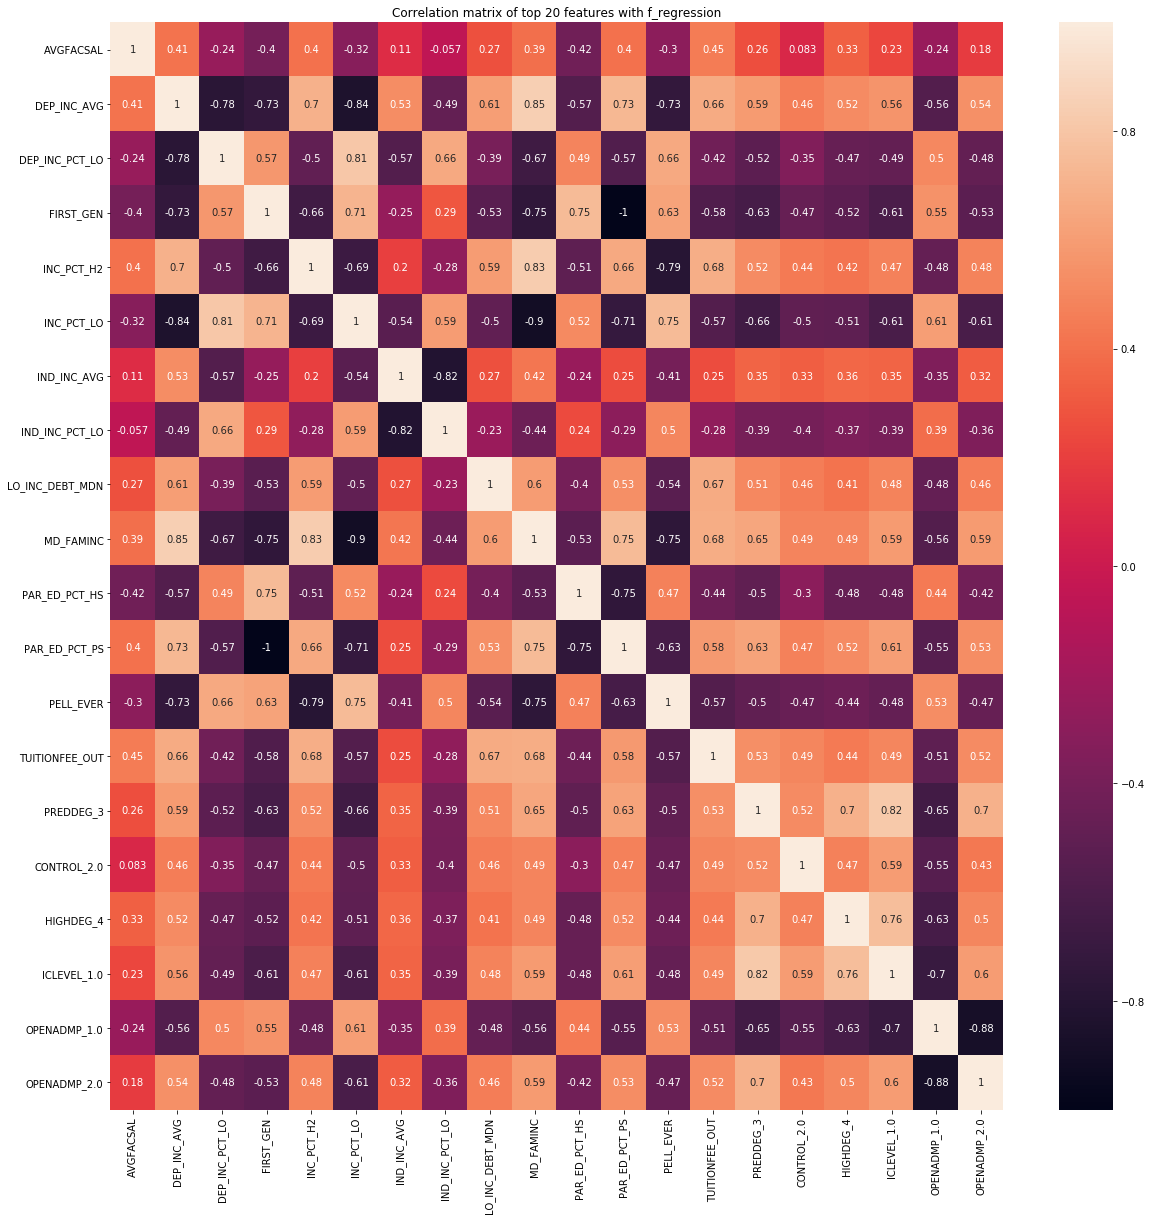

In [290]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(merged_df_no_id[features_df_new.columns].corr(), annot=True)
plt.title('Correlation matrix of top ' + str(k) + ' features with f_regression')
#plt.savefig('Correlation matrix of top 20 features with f_regression')

It is desirable to remove correlated features to prevent Multicollinearity in linear models

In [291]:
from sklearn.feature_selection import mutual_info_regression

x = merged_df_no_id.drop([target], axis=1)
y = merged_df_no_id[target]
selector = SelectKBest(mutual_info_regression, k)
selector.fit(x, y)
# Get columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
features_df_new = x.iloc[:,cols]
features_df_new.columns

Index(['DEPENDENT', 'DEP_INC_AVG', 'DEP_INC_PCT_LO', 'DEP_INC_PCT_M1',
       'DEP_STAT_PCT_IND', 'FIRST_GEN', 'HI_INC_DEBT_MDN', 'INC_PCT_H1',
       'INC_PCT_H2', 'INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 'IND_INC_AVG',
       'IND_INC_PCT_LO', 'IND_INC_PCT_M1', 'MD_FAMINC', 'MD_INC_DEBT_MDN',
       'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS', 'PELL_EVER'],
      dtype='object')

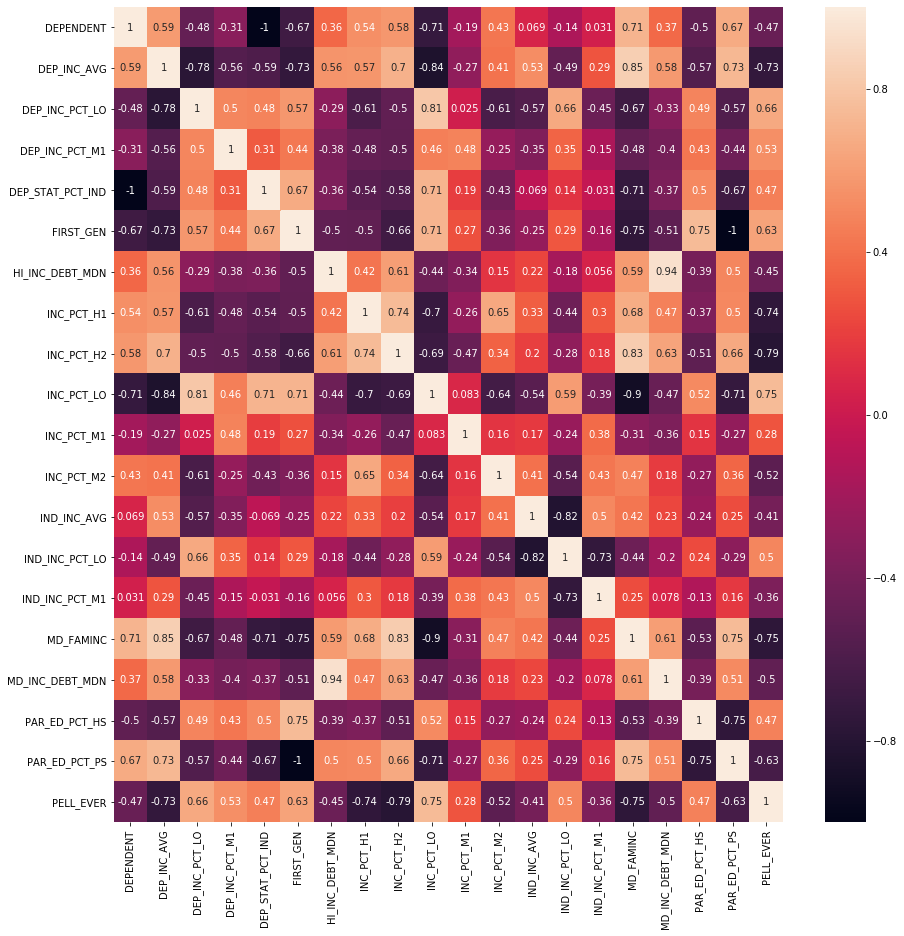

In [292]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(merged_df_no_id[features_df_new.columns].corr(), annot=True)

In [294]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

912.2916165524778

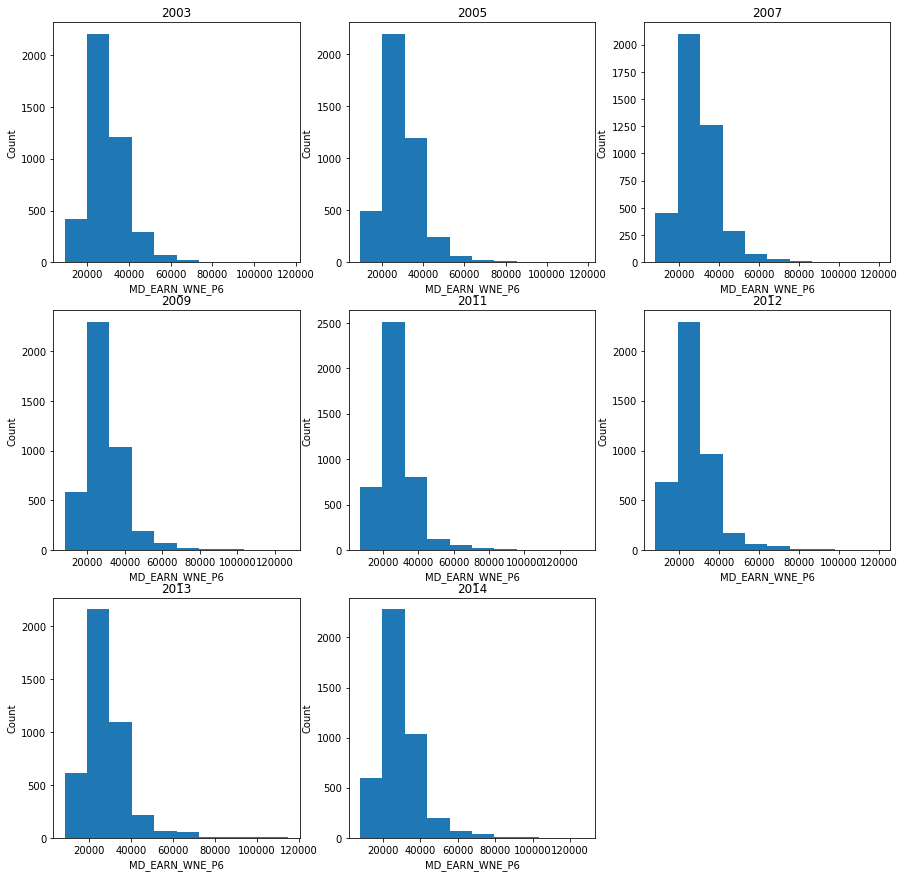

In [86]:
#Data Exploration
unique_years = set(merged_df['Year'])
unique_years.remove(1996)
unique_years.remove(1997)
unique_years.remove(1998)
unique_years.remove(1999)
unique_years.remove(2000)
unique_years.remove(2001)
unique_years.remove(2002)
unique_years.remove(2004)
unique_years.remove(2006)
unique_years.remove(2008)
unique_years.remove(2010)
unique_years.remove(2015)
unique_years.remove(2016)
unique_years.remove(2017)


index = 331
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for y in unique_years:
    plt.subplot(index)
    plt.title(y)
    plt.ylabel('Count')
    plt.xlabel(target)
    plt.hist(merged_df.loc[merged_df['Year'] == y][target])
    index += 1

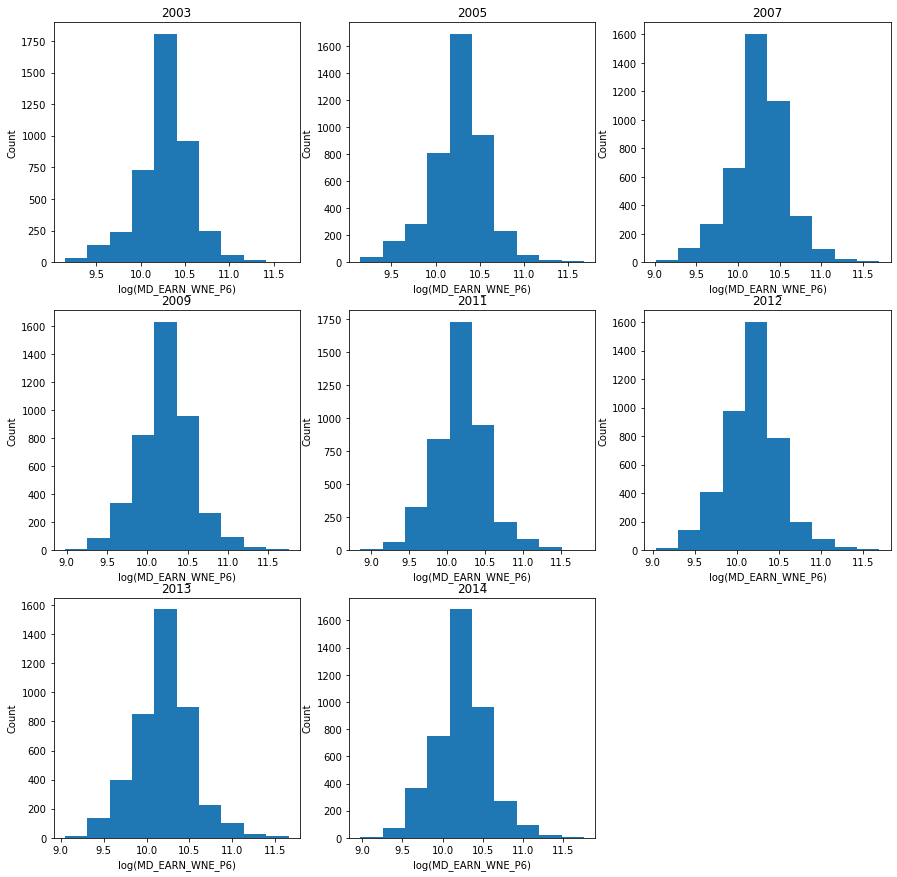

In [73]:
index = 331  
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for y in unique_years:
    plt.subplot(index)
    plt.title(y)
    plt.ylabel('Count')
    plt.xlabel('log(' + target + ')')
    plt.hist(np.log(merged_df.loc[merged_df['Year'] == y][target]))
    index += 1

Consider transforming the target variable and observe impact on mean absolute error or median abosolute error. This should help with linear models. Is random forest linear? what models are linear?
Run models and compare error
https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va

Generate covariance or correctlations for highest feature importances

https://scikit-learn.org/stable/modules/feature_selection.html


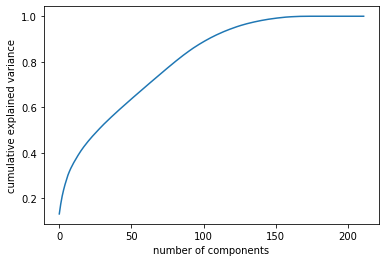

In [195]:
#PCA
from sklearn.preprocessing import StandardScaler

x = merged_df.drop(['Year'], axis=1)
y = merged_df['Year']
x = StandardScaler().fit_transform(x)
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

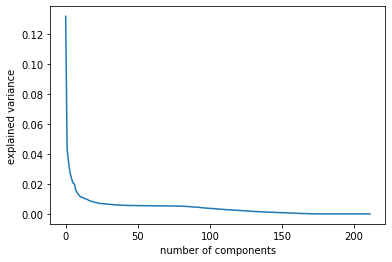

In [196]:
plt.xlabel('number of components')
plt.ylabel('explained variance');
plt.plot(pca.explained_variance_ratio_)

In [278]:
merged_df_test = clean_data.intersection_and_merge(dfs)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [285]:
merged_df_test.filter(regex='^SCH_DEG',axis=1)
#merged_df_test['SCH_DEG_3'].isna().sum()

,SCH_DEG
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [284]:
merged_df_test['PREDDEG']

0        3
1        3
2        3
3        3
4        3
5        3
6        1
7        3
8        3
9        3
10       3
11       2
12       2
13       2
14       2
15       2
16       3
17       2
18       2
19       2
20       2
21       2
22       3
23       3
24       1
25       3
26       2
27       2
28       2
29       3
        ..
93074    1
93075    1
93076    1
93077    2
93078    1
93079    1
93080    2
93081    1
93082    2
93083    1
93084    1
93085    1
93086    1
93087    1
93088    1
93089    2
93090    2
93091    1
93092    1
93093    1
93094    2
93095    1
93096    1
93097    1
93098    1
93099    1
93100    1
93101    1
93102    2
93103    3
Name: PREDDEG, Length: 93104, dtype: int64